# Introduction<a id="desc"></a> 

This project by gym chain Model Fitness aims to develop a customer interaction strategy based on analyzing data to combat customer churn. The goal is to predict the probability of churn for each customer, create user portraits, analyze the factors that impact churn, and develop recommendations to improve customer service. 

The project task are:
- analyzing digitized customer profiles;
- identifying target groups;
- suggesting measures to reduce churn;
- describing patterns related to customer interaction.

The structure:
- data observation;
- EDA and data preprocessing;
- modeling: predictions and clustering;
- overall conclusion and advice for business.



# Importing Libraries<a id="lib"></a> 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

# Downloading Data<a id="df"></a> 

In [2]:
try:
    path = '/datasets/'
    df_gym = pd.read_csv(path+'gym_churn_us.csv')
except:
    path = '/Users/misharimer/Downloads/Practicum Projects/Spint 11. Forecasts and Predictions_Gym Chain/'
    df_gym = pd.read_csv(path+'gym_churn_us.csv')
pd.set_option('display.max_columns', None)

# EDA & Data Preprocessing<a id="df_observ"></a> 

From the documentation we already have the basics about each column:
- 'Churn' — the fact of churn for the month in question

 User data for the preceding month
- 'gender'
- 'Near_Location' — whether the user lives or works in the neighborhood where the gym is located
- 'Partner' — whether the user is an employee of a partner company (the gym has partner companies whose employees get discounts; in those cases the gym stores information on customers' employers)
- Promo_friends — whether the user originally signed up through a "bring a friend" offer (they used a friend's promo code when paying for their first membership)
- 'Phone' — whether the user provided their phone number
- 'Age'
- 'Lifetime' — the time (in months) since the customer first came to the gym

 Data from the log of visits and purchases and data on current membership status
- 'Contract_period' — 1 month, 3 months, 6 months, or 1 year
- 'Month_to_end_contract' — the months remaining until the contract expires
- 'Group_visits' — whether the user takes part in group sessions
- 'Avg_class_frequency_total' — average frequency of visits per week over the customer's lifetime
- 'Avg_class_frequency_current_month' — average frequency of visits per week over the preceding month
- 'Avg_additional_charges_total' — the total amount of money spent on other gym services: cafe, athletic goods, cosmetics, massages, etc.

In [3]:
df_gym.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

For convenience, let's create a UID (unique identifier) column for our table. Since we can consider each row as unique, a simple consecutive order would be sufficient. Once we create the UID column, we will move it to the first position in the table.





In [4]:
df_gym ['UID'] = df_gym.reset_index().index + 1
UID_col = df_gym.pop('UID')
df_gym.insert(0, 'UID', UID_col)

In [5]:
df_gym.head()

,UID,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,2,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,3,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,4,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,5,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


A pinch of custom info

In [6]:
def custom_info (df):
    for col in df:
        print('column name:', col)
        print('data type:',df[col].dtype)
        print('number of values:',df[col].shape)
        print('number of unique values:',df[col].nunique())  
        print('unique values:',df[col].unique())
        print('number of missing values:', df[col].isna().sum())
        print('percentage of missing values:',round(df[col].isna().sum()/len(df)*100,2))
        print('number of zero values:',len(df[df[col]==0]))
        print('-'*20)
        print()
custom_info (df_gym)

column name: UID
data type: int64
number of values: (4000,)
number of unique values: 4000
unique values: [   1    2    3 ... 3998 3999 4000]
number of missing values: 0
percentage of missing values: 0.0
number of zero values: 0
--------------------

column name: gender
data type: int64
number of values: (4000,)
number of unique values: 2
unique values: [1 0]
number of missing values: 0
percentage of missing values: 0.0
number of zero values: 1959
--------------------

column name: Near_Location
data type: int64
number of values: (4000,)
number of unique values: 2
unique values: [1 0]
number of missing values: 0
percentage of missing values: 0.0
number of zero values: 619
--------------------

column name: Partner
data type: int64
number of values: (4000,)
number of unique values: 2
unique values: [1 0]
number of missing values: 0
percentage of missing values: 0.0
number of zero values: 2053
--------------------

column name: Promo_friends
data type: int64
number of values: (4000,)
numb

In [7]:
print('Number of duplicated rows in the dataframe:',df_gym.duplicated().sum())


Number of duplicated rows in the dataframe: 0


So far, we haven't identified any significant issues with our data. There are no missing values, duplicates, or weird values. However, there are a few minor things we could do to improve the perception of the data:

1) Use lowercase letters in our column names.
2) Rename the 'Avg_additional_charges_total' column to better reflect its content. The current name suggests an average, but it actually reflects the total amount of money spent. Ideally, we would work with data engineers to define a more appropriate name, but in the absence of that option, we can rename it according to the description in the documentation.
3) Rename the 'Avg_class_frequency_current_month' and columns 'Avg_class_frequency_total' to better reflect its content.
4) Convert the values in the 'month_to_end_contract' column from float to integer. Since we don't have fractional values indicating the proportion of days remaining until the end of the contract, it's likely that the decimal points are a result of rounding. Thus, it would be more appropriate to treat the values as integers.

Let's make those changes now so that our data is easier to work with. Then, we can continue with our exploratory data analysis and see what insights we can uncover.

In [8]:
df_gym = df_gym.rename(columns={'Avg_additional_charges_total': 'additional_charges_total',
                                 'Avg_class_frequency_current_month': 'avg_w_frequency_lastmonth',
                                 'Avg_class_frequency_total': 'avg_w_frequency_lifetime'})

In [9]:
df_gym.columns = df_gym.columns.map(lambda x: x.lower())
#df_gym.columns=df_gym.columns.str.lower()

In [10]:
df_gym['month_to_end_contract'] = df_gym['month_to_end_contract'].astype(int)

Now let's check the basic statistic on data and build the distributions for each columns

In [11]:
df_gym.describe()

,uid,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,additional_charges_total,month_to_end_contract,lifetime,avg_w_frequency_lifetime,avg_w_frequency_lastmonth,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,2000.500000,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,1154.844867,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1000.750000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,2000.500000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,3000.250000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,4000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Based on the describe method and observations made above, we can group the data in the columns into two parts: binary variables and continuous variables.

Binary variables:

- gender: our customers are almost equally divided between genders, with 51% and 49%
- near_Location: almost 85% of our customers live near the gym
- partner: almost 50% of our customers belong to a partner company
- promo_friends: 30% of our customers were referred by their friends
- phone: Every one of our customers shares a phone number with us
- group_visits: 41% of customers took part in group sessions
- churn: 26% of our customers churned in the previous month

nonbinary
- contract_period
- age
- avg_additional_charges_total
- month_to_end_contract
- lifetime 
- avg_class_frequency_total
- avg_class_frequency_current_month

We should consider the possibility that some of the columns may have outliers. To check this, let's plot histograms of the non-binary columns (and binary as well) to see if their distribution gives us any insights. Based on our findings, we can then decide on the next steps in order not to disturt our further result of models.

Let's examine not only the distribution of each feature but also compare it between clients who churned and those who remained in the gym.

In [12]:
df_gym_churned = df_gym.query('churn==1')
df_gym_remained = df_gym.query('churn==0')

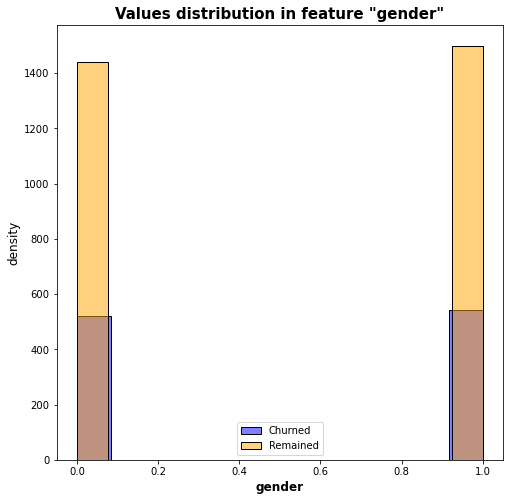

Mean for churned: 0.51; Mean for remained: 0.51
Median for churned: 1.0; Median for remained: 1.0
________________________________________________________________
 


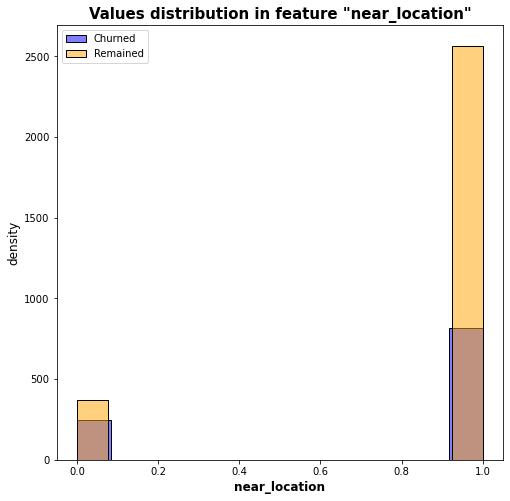

Mean for churned: 0.77; Mean for remained: 0.87
Median for churned: 1.0; Median for remained: 1.0
________________________________________________________________
 


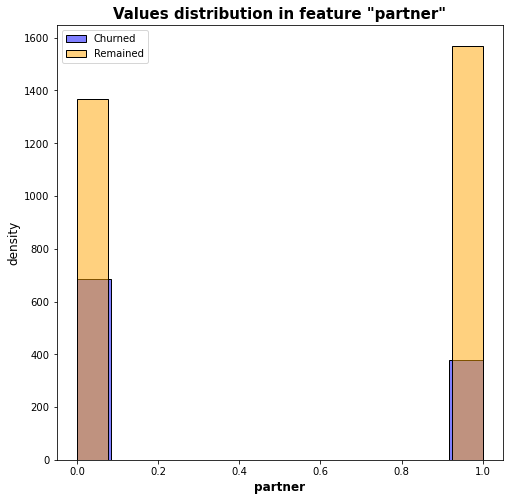

Mean for churned: 0.36; Mean for remained: 0.53
Median for churned: 0.0; Median for remained: 1.0
________________________________________________________________
 


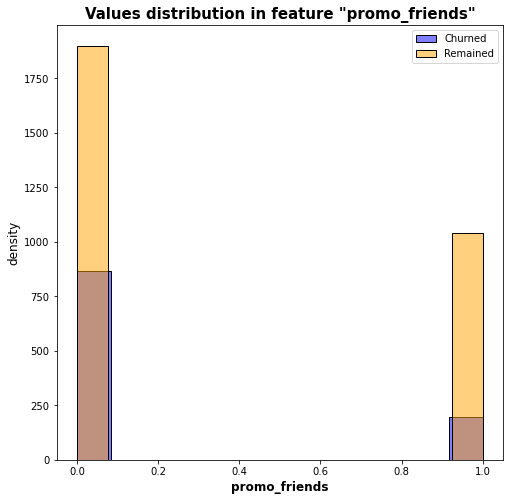

Mean for churned: 0.18; Mean for remained: 0.35
Median for churned: 0.0; Median for remained: 0.0
________________________________________________________________
 


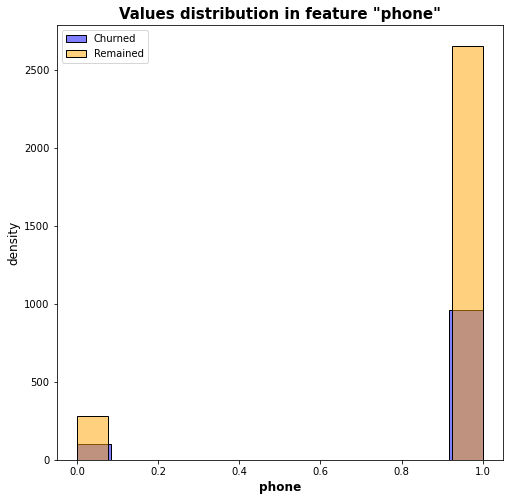

Mean for churned: 0.9; Mean for remained: 0.9
Median for churned: 1.0; Median for remained: 1.0
________________________________________________________________
 


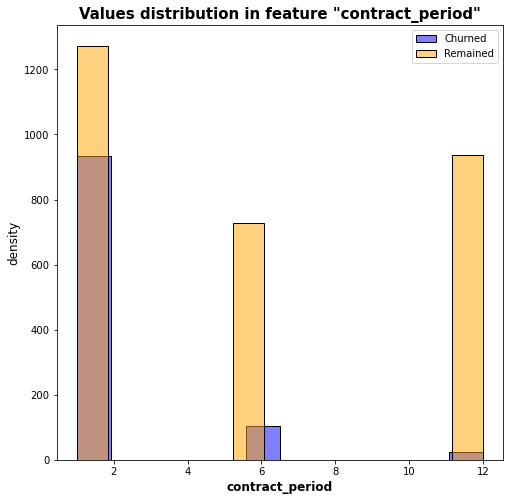

Mean for churned: 1.73; Mean for remained: 5.75
Median for churned: 1.0; Median for remained: 6.0
________________________________________________________________
 


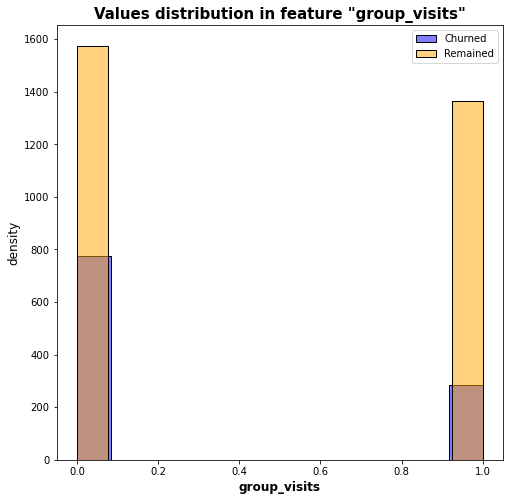

Mean for churned: 0.27; Mean for remained: 0.46
Median for churned: 0.0; Median for remained: 0.0
________________________________________________________________
 


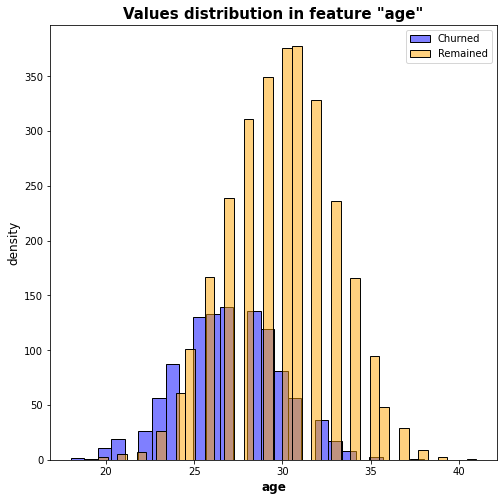

Mean for churned: 26.99; Mean for remained: 29.98
Median for churned: 27.0; Median for remained: 30.0
________________________________________________________________
 


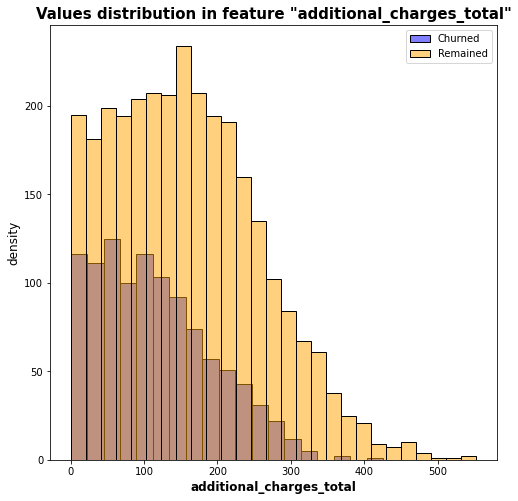

Mean for churned: 115.08; Mean for remained: 158.45
Median for churned: 103.81; Median for remained: 149.88
________________________________________________________________
 


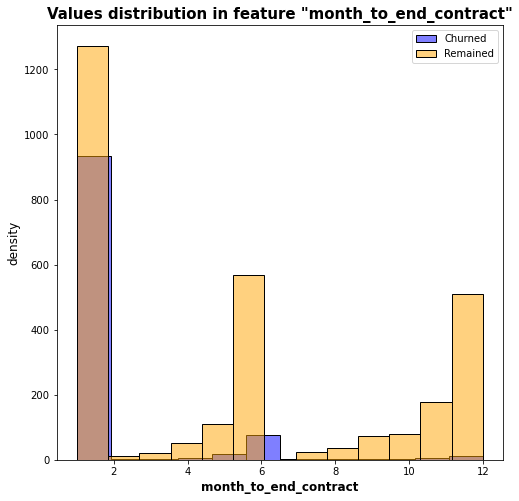

Mean for churned: 1.66; Mean for remained: 5.28
Median for churned: 1.0; Median for remained: 6.0
________________________________________________________________
 


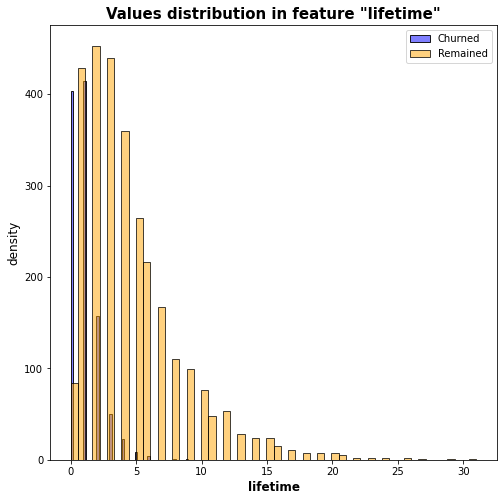

Mean for churned: 0.99; Mean for remained: 4.71
Median for churned: 1.0; Median for remained: 4.0
________________________________________________________________
 


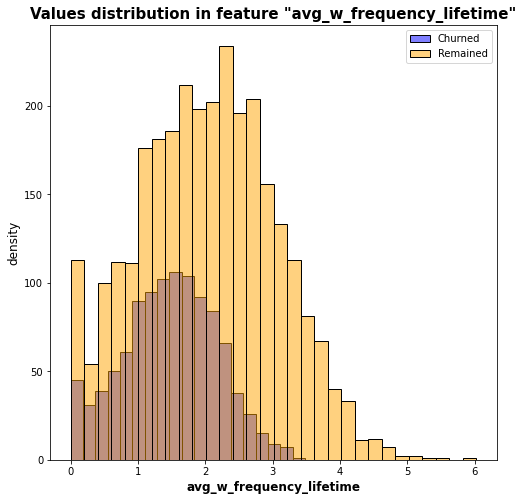

Mean for churned: 1.47; Mean for remained: 2.02
Median for churned: 1.49; Median for remained: 2.04
________________________________________________________________
 


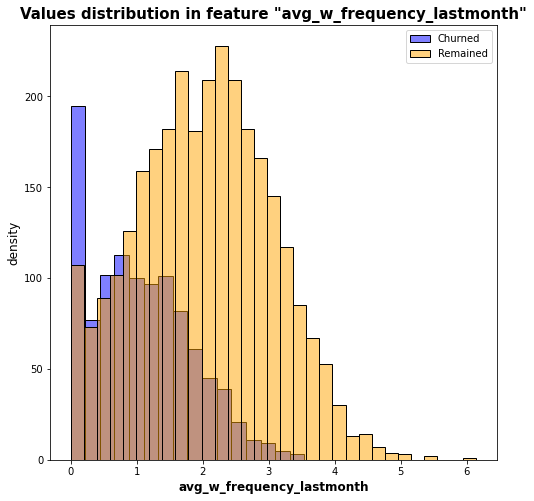

Mean for churned: 1.04; Mean for remained: 2.03
Median for churned: 0.98; Median for remained: 2.05
________________________________________________________________
 


In [13]:
for each in df_gym.drop(['uid', 'churn'], axis=1).columns:
    plt.figure(figsize=(8, 8))
    sns.histplot(data=df_gym_churned[each], color='blue', alpha=0.5, label='Churned')
    sns.histplot(data=df_gym_remained[each], color='orange', alpha=0.5, label='Remained')
    plt.title('Values distribution in feature "{}"'.format (each),fontweight='bold', size = 15)
    plt.xlabel(each, fontweight='bold',size=12)
    plt.ylabel('density',size=12)
    plt.legend()
    plt.show()
    print('Mean for churned: {}; Mean for remained: {}'.format(round(df_gym.query('churn == 1')[each].mean(),2), 
                                                               round(df_gym.query('churn == 0')[each].mean(),2)))
    print('Median for churned: {}; Median for remained: {}'.format(round(df_gym.query('churn == 1')[each].median(),2), 
                                                               round(df_gym.query('churn == 0')[each].median(),2)))
    print('__'*32)
    print(' ')

Let's compare the results of the describe methods applied separately to churned and retained customers. Once we've done that, we can move on to what we've revealed.

In [14]:
churned_desc = df_gym_churned.drop(['uid','churn'],axis=1).describe()
remained_desc = df_gym_remained.drop(['uid','churn'],axis=1).describe()

churned_desc['dataset'] = 'churned'
remained_desc['dataset'] = 'remained'

df_combined = pd.concat([churned_desc, remained_desc])

comparison_table = df_combined.pivot(columns='dataset')
comparison_table

gender              near_location                   partner  \
dataset      churned     remained       churned     remained      churned   
25%         0.000000     0.000000      1.000000     1.000000     0.000000   
50%         1.000000     1.000000      1.000000     1.000000     0.000000   
75%         1.000000     1.000000      1.000000     1.000000     1.000000   
count    1061.000000  2939.000000   1061.000000  2939.000000  1061.000000   
max         1.000000     1.000000      1.000000     1.000000     1.000000   
mean        0.510839     0.510037      0.768143     0.873086     0.355325   
min         0.000000     0.000000      0.000000     0.000000     0.000000   
std         0.500118     0.499984      0.422217     0.332933     0.478837   

                     promo_friends                     phone               \
dataset     remained       churned     remained      churned     remained   
25%         0.000000      0.000000     0.000000     1.000000     1.000000   
50%         1.000000      0.000000     0.000000     1.000000     1.000000   
75%         1.000000      0.000000     1.000000     1.000000     1.000000   
count    2939.000000   1061.000000  2939.000000  1061.000000  2939.000000   
max         1.000000      1.000000     1.000000     1.000000     1.000000   
mean        0.534195      0.183789     0.353522     0.902922     0.903709   
min         0.000000      0.000000     0.000000     0.000000     0.000000   
std         0.498914      0.387495     0.478144     0.296204     0.295040   

        contract_period              group_visits                       age  \
dataset         churned     remained      churned     remained      churned   
25%            1.000000     1.000000     0.000000     0.000000    25.000000   
50%            1.000000     6.000000     0.000000     0.000000    27.000000   
75%            1.000000    12.000000     1.000000     1.000000    29.000000   
count       1061.000000  2939.000000  1061.000000  2939.000000  1061.000000   
max           12.000000    12.000000     1.000000     1.000000    38.000000   
mean           1.728558     5.747193     0.268615     0.464103    26.989632   
min            1.000000     1.000000     0.000000     0.000000    18.000000   
std            2.132371     4.716942     0.443448     0.498795     2.895163   

                     additional_charges_total               \
dataset     remained                  churned     remained   
25%        28.000000                50.629127    76.920993   
50%        30.000000               103.814686   149.881171   
75%        32.000000               165.616858   224.448274   
count    2939.000000              1061.000000  2939.000000   
max        41.000000               425.535220   552.590740   
mean       29.976523               115.082899   158.445715   
min        19.000000                 0.148205     0.171862   
std         3.009933                77.696419    99.801599   

        month_to_end_contract                  lifetime               \
dataset               churned     remained      churned     remained   
25%                  1.000000     1.000000     0.000000     2.000000   
50%                  1.000000     6.000000     1.000000     4.000000   
75%                  1.000000    10.000000     1.000000     6.000000   
count             1061.000000  2939.000000  1061.000000  2939.000000   
max                 12.000000    12.000000     9.000000    31.000000   
mean                 1.662582     5.283089     0.990575     4.711807   
min                  1.000000     1.000000     0.000000     0.000000   
std                  1.964593     4.363522     1.110799     3.874780   

        avg_w_frequency_lifetime              avg_w_frequency_lastmonth  \
dataset                  churned     remained                   churned   
25%                     1.010771     1.283137                  0.421337   
50%                     1.491187     2.043252                  0.979445   
75%                     1.956438     2.

So, what we can conclude about each feature when comparing the behavior of churned and retained customers- gender: 
- gender and phone have similar distributions and mean values (in binary features mean also reflect its share) for both churned and remained customers;
- near_location - among the customers who have churned, there is a smaller proportion of those who live near the gym compared to those who remained. This difference is only 10%, but it is still a factor worth considering. A long commute can be the last straw for customers who are unsure about whether to continue going to the gym. It may also be worth considering opening a new branch if all the churned customers who do not live near the current gym location are concentrated in a certain area;
- partner - among the remaining customers, there are 20% more who are employees of partner companies. Apparently, having discounts makes customers more loyal
- promo_friends - the same effect as with partnering programs can be observed with promos from friends. Apparently, having discounts influences gym customers' willingness to stay. Among the churned customers, 17% had a promo from their friends
- contract_period -  it also seems to be a factor in customer retention. More than 75% of those who churned had a 1-month contract, while among remaining customers, the most common contract term was 12 months. It is possible that most of those who had a 1-month contract were not our regular customers and had signed up for the gym to try it out.
- group_visits  - There is an almost 20% difference between remaining and churned customers in terms of attendance at group classes. Remaining customers are more likely to attend group classes compared to those who churned
- age - The average age of churned customers is slightly younger than that of remaining customers, with an average age of 27 compared to 30
- additional_charges_total - churned customers have spent an average of 40 credits less on additional charges compared to remaining customers
- month_to_end_contract - since most of the churned customers had a one-month contract, the number of months until the end of their contract tends to be one month (probably there is a rounding: one month includes anything more than one day until the end of the contract)
- lifetime - the difference in months of lifetime confirms our previous suggestion. The majority of churned customers were with us for just one month, while the range of remaining customers' lifetimes is wide, from one month to 35, but their average lifetime is 4.7 months. This leads us to believe that churned customers were mostly one-time customers who had signed up for the gym to try it out
- avg_w_frequency_lifetime - average attendance rates appear to be similar among both groups, with the majority of customers not frequently attending the gym over their lifetime, with an average of 2 days per week for remaining customers and 1.5 days per week for churned customers. However, there is a wider variety of attendance rates among remaining customers, with some attending up to 6 days a week (which is very rare), while the maximum value for churned customers is 3.5 times a week
- avg_w_frequency_lastmonth - almost the same for attendance rates during last month: churned customers attended the gym on average once a week during their last month, while remaining customers attended twice a week. Again there is a wider range of attendance rates among remaining customers. It's also worth noting that a substantial portion of churned customers did not attend the gym during the month prior to dropping their membership.


Now, let's move on with correlation

In [15]:
cm_overall = df_gym.corr()

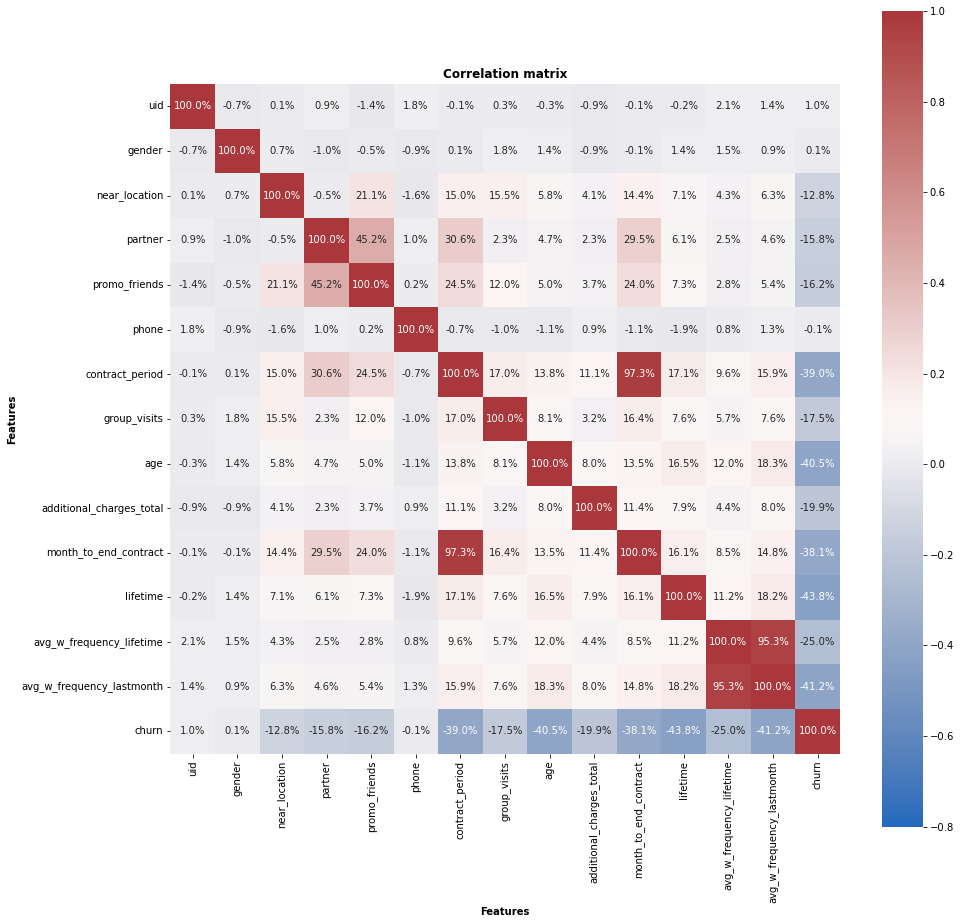

In [16]:
plt.figure(figsize=(15, 15))
sns.heatmap(cm_overall, annot = True, square = True,fmt='.1%',vmin=-0.8, cmap='vlag')
plt.title('Correlation matrix',fontweight='bold')
plt.xlabel('Features', fontweight='bold')
plt.ylabel('Features', fontweight='bold')
plt.show()

Correlation matrix revealed that churn has some dependence on: 
- lifetime (-44%)
- average_w_frequency_lastmonth (-41%)
- age (-40%)
- contract period (-39%)
- month_to_end_contract (-38%)

Negative correlation values means the smaller the feature the more chances for customer to churn




It is important to note that when conducting further modeling, it is necessary to exclude features that are highly correlated with each other. This is because they may be tracking the same characteristics, which could result in double-weighting in logistic regression. As seen in the correlation matrix above, the following pairs of features exhibit a strong correlation (almost 100%):
- avg_w_frequency_lastmonth and avg_w_frequency_lifetime
- month_to_end_contract and contract period

On the following step we exclude those columns out of the data

None of the other features show a significant correlation with either churn or each other



# Prediction Model

First, we should remove one of the paired features that we identified earlier to avoid model distortion caused by multicollinearity. I also suggest excluding the uid column. It turns out that adding this column did not provide any benefits for our analysis.

In [17]:
df_gym_clean = df_gym.drop({'avg_w_frequency_lifetime', 'month_to_end_contract', 'uid'}, axis=1)

Now we can move on for a training and modeling. We are going to apply logistic regression and random forest classifier models

Dividing data into features (x) and  target variable (y)

In [18]:
X = df_gym_clean.drop('churn', axis=1)
y = df_gym_clean['churn']

Dividing data into training and testing sets

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Next our data needed to standardize.

In [20]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

Now we can create linerar regression model and train it

In [21]:
lr_model = LogisticRegression(random_state=0)
lr_model.fit(X_train_st, y_train)
lr_predictions = lr_model.predict(X_test_st)

Creating a function to calculate and print metrics for both models

In [22]:
def model_metrics(model, test, pred):
    print('{} metrics'.format(model))
    print('Accuracy: {:.2f}'.format(accuracy_score(test, pred)))
    print('Precision: {:.2f}'.format(precision_score(test, pred)))
    print('Recall: {:.2f}'.format(recall_score(test, pred)))
    print('F1: {:.2f}'.format(f1_score(test, pred)))


In [23]:
model_metrics ('Logistic regression',y_test, lr_predictions)

Logistic regression metrics
Accuracy: 0.90
Precision: 0.79
Recall: 0.82
F1: 0.81


Printing each feature weight according logistic linear model

In [40]:
print ('LR model weights',lr_model.coef_)

LR model weights [[ 0.05067028 -0.08307583 -0.06922487 -0.24443676 -0.08811884 -1.34086237
  -0.37890924 -1.10247838 -0.58201997 -3.92270308 -1.32673363]]


Next step is to create random forest model and to compare its result with logistic regression

In [24]:
rf_model= RandomForestClassifier(random_state=0)
rf_model.fit(X_train_st, y_train)
rf_predictions= rf_model.predict(X_test_st)

In [25]:
model_metrics ('Random forrest',y_test, rf_predictions)

Random forrest metrics
Accuracy: 0.90
Precision: 0.81
Recall: 0.75
F1: 0.78


In [43]:
print ('RF model weights',rf_model.feature_importances_)

RF model weights [0.01663551 0.01204971 0.01640302 0.01603098 0.00828671 0.11094857
 0.02026239 0.13843882 0.12337494 0.32126068 0.21630867]


Both the Logistic Regression and Random Forest models equally have high accuracy. However, the Logistic Regression model has a higher recall and F1 score, indicating it is better at identifying true positives (churn cases), while the Random Forest model has a higher precision, indicating it is better at minimizing false positives (misclassifying non-churn customers as churn). The choice of which model to use depends on business priorities: if identifying all churn cases is more important, use Logistic Regression; if minimizing false positives is more important, use Random Forest.





# Customers Clusterization

In [26]:
sc = StandardScaler()

In [27]:
X_sc = sc.fit_transform(X)
linked = linkage(X_sc, method = 'ward') 

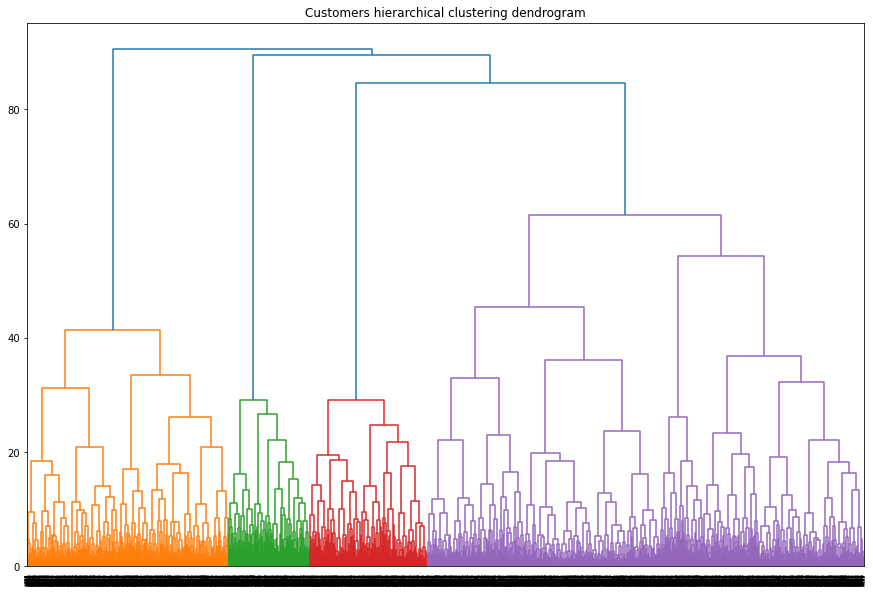

In [28]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Customers hierarchical clustering dendrogram')
plt.show()

The suggested optimal number of clusters is 4, correspondoing to the four different colors we see on the dendrogram

But now based on the advice given, let's set the number of clusters to 5



In [35]:
km = KMeans(n_clusters = 5, random_state=0)
labels = km.fit_predict(X_sc)
df_gym_clean['cluster'] = labels

In [36]:
df_gym_clean.groupby('cluster').mean().reset_index()


,cluster,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,additional_charges_total,lifetime,avg_w_frequency_lastmonth,churn
0,0,0.496447,0.995939,0.892386,1.000000,1.0,6.922843,0.524873,29.606091,153.424651,4.283249,1.919520,0.119797
1,1,0.500000,0.000000,0.489247,0.078853,1.0,2.994624,0.232975,28.679211,137.125763,2.974910,1.597146,0.403226
2,2,0.500940,1.000000,0.217105,0.072368,1.0,2.010338,0.277256,27.583647,119.339956,1.922932,1.203319,0.563910
3,3,0.534260,0.996028,0.379345,0.009930,1.0,6.208540,0.538232,30.699106,176.259567,5.415094,2.324220,0.014896
4,4,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,3.940415,1.723967,0.266839


Now, let's describe cluster the highest and the smallest share of churned customers. 

Starting with the cluster of users that have the highest share of churned customers - 56%, labeled as #2. Here are some characteristics of this cluster:
- near_location - contrary to our expectation that proximity to the gym would decrease churn rate, 100% of the customers in this cluster live near the gym
- partner - this cluster has the lowest share of customers who are partner employees
- promo_friends - customers from cluster #2 rarely had a promo code from their friends
- contract_period - had the shortest contracts
- group_visits - the smallest share of customers attended group activities
- age - the youngest
- additional_charges_total - spent the least amount of money on addtitional services and related products
- lifetime - contains the most recent customers
- avg_w_frequency_lastmonth - had the lowest attendency rate during the lifetime

Now the cluster of users with the lowest share of churned customers - 1,5%, labeled as #3

- near_location -  99% of the customers in this cluster live near the gym
- partner - this cluster as well has one of the lowest share of customers who are partner employees
- promo_friends - smallest share of customers who had a promo from friends
- contract_period - had the second most longest contracts
- group_visits - the highest share of customers attended group activities
- age - the oldest
- additional_charges_total - spent the most amount of money on addtitional services and related products
- lifetime - contains the longest-standing customers
- avg_w_frequency_lastmonth - had the highest attendency rate during the lifetime

Now let's have a look on graphical distributions of features for the clusters

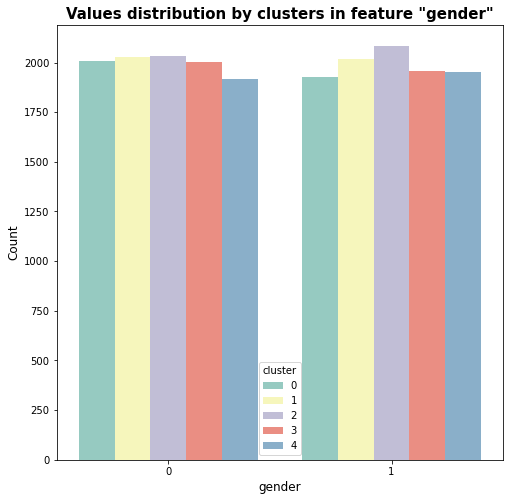

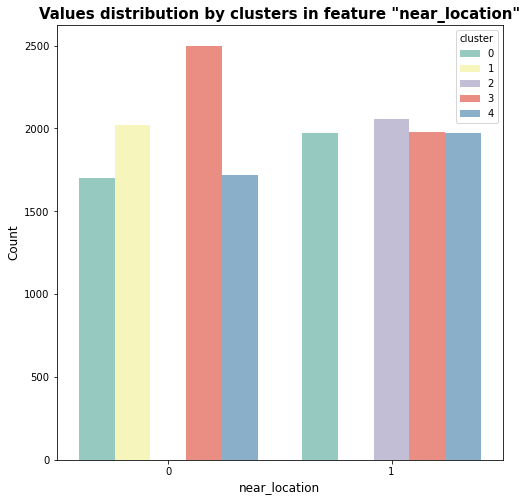

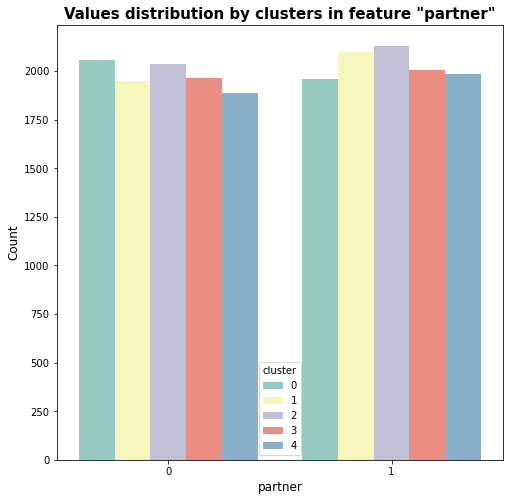

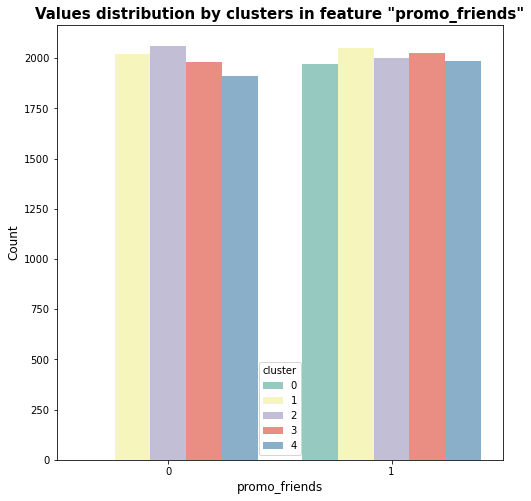

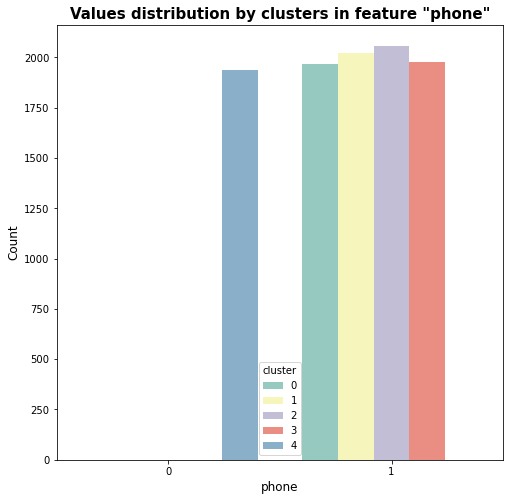

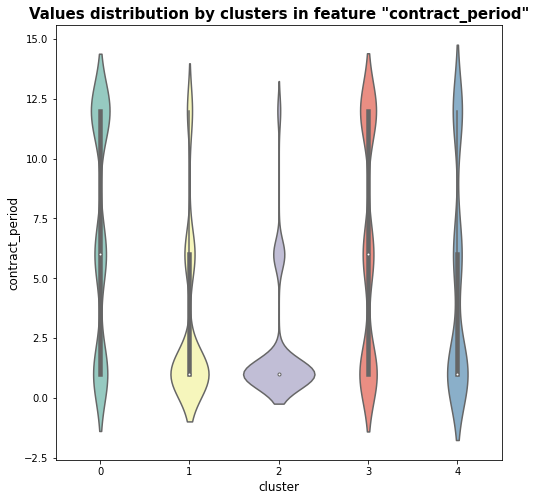

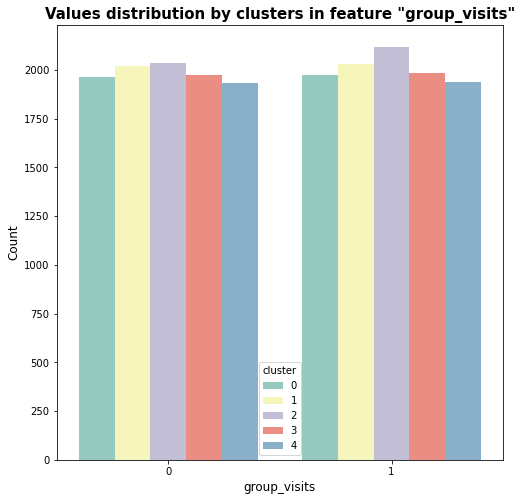

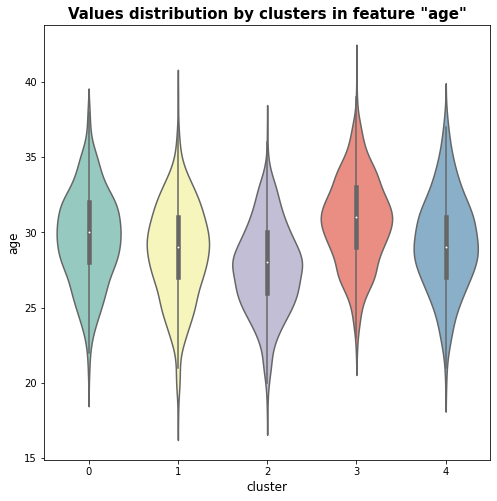

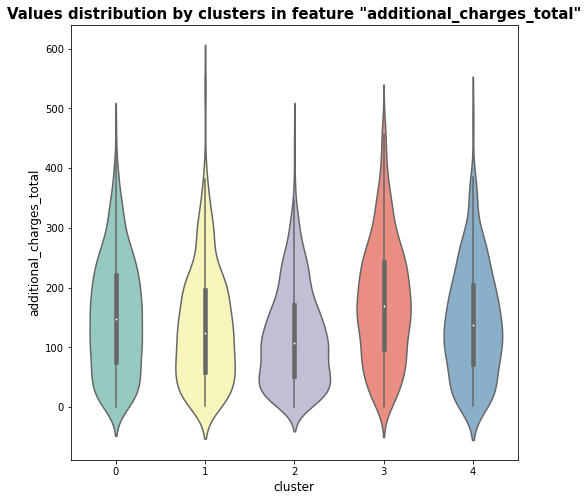

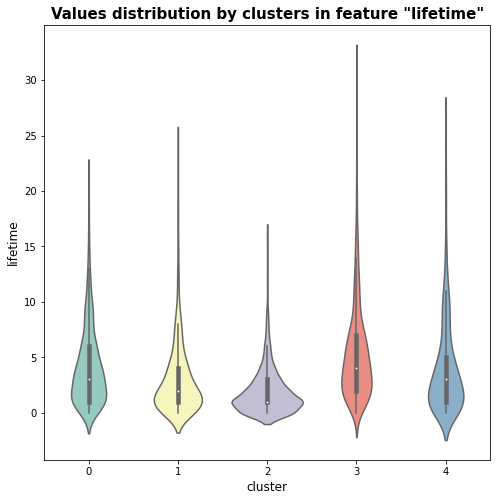

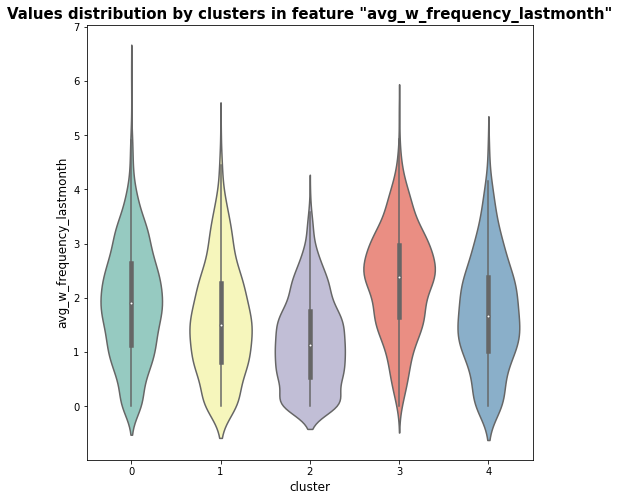

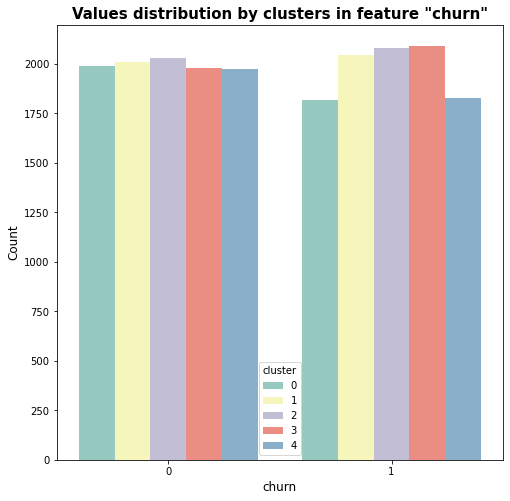

In [94]:
for each in df_gym_clean.drop('cluster',axis=1).columns:
    if df_gym_clean[each].nunique() > 2:
        plt.figure(figsize=(8, 8))
        sns.violinplot(y=each, x = 'cluster', data=df_gym_clean,palette='Set3')
        plt.title('Values distribution by clusters in feature "{}"'.format(each),fontweight='bold',size = 15)
        plt.ylabel(each,size=12)
        plt.xlabel('cluster',size=12)
        plt.legend
        plt.show
    else:
        plt.figure(figsize=(8, 8))
        sns.barplot(data=df_gym_clean, x = each, y = df_gym_clean.index, hue = 'cluster', ci = 0,palette='Set3')
        plt.title('Values distribution by clusters in feature "{}"'.format(each),fontweight='bold',size = 15)
        plt.xlabel(each,size=12)
        plt.ylabel('Count',size=12)
        plt.legend
        plt.show       


The distribution plots provides the same insights as we draw previously. The main features determining the difference between clusters 2 and 3 are: 
- contract_period
- group_visits
- age
- additional_charges_total
- lifetime
- avg_w_frequency_lastmonth


Although the churn rate is included in the table above, since mean for binary values = its share, we will calculate churn separately.

In [120]:
round((df_gym_clean.query('churn==1').groupby('cluster')['churn'].count()/df_gym_clean.groupby('cluster')['churn'].count())*100,2)

cluster
0    11.98
1    40.32
2    56.39
3     1.49
4    26.68
Name: churn, dtype: float64

As we noted earlier, the customers in cluster number 2 have the highest churn rate, while those in cluster number 3 have the lowest

# Conclusions

This project was conducted to help Model Fitness gym chain to reduce customer churn. We applied exploratory data analysis and various machine learning techniques to achieve this goal.

First, we explored the gym chain's dataset and made changes to improve its quality. This included using lowercase letters in column names, renaming some columns to better reflect their content, and converting some columns' values from float to integer. We also identified collinearity between certain columns and removed them from further analysis.

Our initial data exploration revealed some important insights about our customers. We found that our customers were almost equally divided between genders, with 85% of them living near the gym. About 50% of our customers belonged to a partner company, while 30% were referred by their friends. Almost 41% of our customers took part in group sessions, and 26% churned in the previous month.

Next, we built two forecasting models to predict churn rate using the current month's data. We standardized the data and created a logistic regression model and a random forest classifier model. The logistic regression model outperformed the random forest classifier model.

Using dendrograms and k-means clustering, we segmented our customers into five clusters. We found that age, lifetime, average weekly frequency last month, contract period, and month-to-end contract were the most significant factors influencing churn. 

Customers in the cluster with the lowest churn rate were the oldest, had longer contracts, frequently participated in group activities, and spent the most on additional services and related products. Customers in the cluster with the highest churn rate were the youngest, had shorter contracts, rarely participated in group activities, and spent the least on additional services and related products.


We recommended that Model Fitness gym chain focus on retaining customers with longer lifetimes and higher attendance rates, while targeting younger customers with shorter contracts and incentivizing them to participate in group activities. We also suggested that the gym chain encourage customers to spend more on additional services and related products, offer personalized discounts or promotions based on customer behavior, and conduct regular customer satisfaction surveys to gather feedback and improve the overall customer experience.


Advice

Based on the analysis, we recommend the following strategies to reduce churn for Model Fitness gym chain:
1. To target younger customers (around 27 yo and younger) with shorter contracts and incentivizing them to participate in group activities and sign for a long term contract.
2. Consider offering discounts or promotions to encourage customers to sign longer-term contracts, such as moving from 1-month to 3-month contracts, and offering loyalty programs around nearest locations to attract customers.
3. Encourage customers to spend more on additional services and related products, offer personalized discounts or promotions based on customer behavior, and conduct regular customer satisfaction surveys to gather feedback and improve the overall customer experience.
4. Keep focusing on retaining customers with longer lifetimes and higher attendance rates;

By implementing these strategies, Model Fitness gym chain can improve customer retention rates, reduce churn, and increase overall customer satisfa